# Initial Data Processing

In [1]:
from matplotlib import pyplot as plt
from pprint import pprint
import seaborn as sn 
import pandas as pd
import numpy as np
import requests
import random
import re

movies = ["tt0381061", "tt0482571", "tt1232829", "tt1853728", "tt0993846", "tt0314331", "tt0362227", "tt0446029", "tt1631867","tt0841032",
"tt0266543",
"tt0371746",
"tt1219827",
"tt0317919",
"tt0373889",
"tt0488120",
"tt0414993",
"tt0325980",
"tt0367882",
"tt0337978",
"tt0371746",
"tt0482571",
"tt0417741",
"tt0253474",
"tt0362227",
"tt0480249",
"tt0328107",
"tt0383574",
"tt0414055",
"tt0458481",
"tt0338013",
"tt0286716",
"tt0253474",
"tt0362227",
"tt0417741",
"tt0371746",
"tt0482571",
"tt0327056",
"tt0266543",
"tt0465234",
"tt0246578",
"tt0372784",
"tt0496806",
"tt0325980",
"tt0264464",
"tt0405422",
"tt0480249",
"tt0414852",
"tt0330373",
"tt0365748",
"tt0363163",
"tt0417741",
"tt0332452",
"tt0278504",
"tt0480249",
"tt0372183",
"tt0289879",
"tt0422295",
"tt0382932",
"tt0449088",
"tt0371746",
"tt0405422",
"tt1210819",
"tt0780653",
"tt0413300",
"tt0816692",
"tt0329691",
"tt0417741",
"tt0482571",
"tt0338013",
"tt0325980",
"tt0413300",
"tt0482571",
"tt0371246",
"tt0245429",
"tt0363163",
"tt0330373",
"tt0399295",
"tt0467406",
"tt0425210",
"tt0371746",
"tt1232829",
"tt0399295",
"tt0489099",
"tt0362227",
"tt0328107",
"tt0405422",
"tt0299930",
"tt0417741",
"tt0275847",
"tt0330373",
"tt0241527",
"tt0379786",
"tt0480249",
"tt0289879",
"tt0362227",
"tt0411008",
"tt0397313",
"tt0295297",
"tt0275847",
"tt0347149",
"tt0477348",
"tt0259711",
"tt0405508",
"tt0371746",
"tt0286716",
"tt0486655",
"tt0362227",
"tt0328107",
"tt0249462",
"tt0245429",
"tt0371746",
"tt0289879",
"tt0322259",
"tt0259711",
"tt0290334",
"tt0333766",
"tt0265086",
"tt0388795",
"tt0362227",
"tt0245429",
"tt0482571",
"tt0362165",
"tt0298148",
"tt0414993",
"tt0381707",
"tt0373889",
"tt0328107",
"tt0478087",
"tt0448124",
"tt0266543",
"tt0371746",
"tt0405422",
"tt0482571",
"tt0848228",
"tt1232829",
"tt1528100",
"tt1895587",
"tt2076822",
"tt2278388",
"tt0266543",
"tt0361862",
"tt0405159",
"tt0482571",
"tt0498399",
"tt0770828",
"tt0905372",
"tt1170358",
"tt1216475",
"tt1838556",
"tt0289879",
"tt0499448",
"tt0325710",
"tt0413267",
"tt0362478",
"tt0482571",
"tt0332452",
"tt0448124",
"tt0401855",
"tt0373889",
"tt0313542",
"tt0277296",
"tt0259324",
"tt0372784",
"tt0382932",
"tt0246578",
"tt0405422",
"tt0338013",
"tt0246578",
"tt0322259",
"tt0338013",
"tt0299977",
"tt0413300",
"tt0482571",
"tt0363771",
"tt0383574",
"tt0258463",
"tt0327056",
"tt0371746",
"tt0429589",
"tt0371746",
"tt0246578",
"tt1219289",
"tt0383574",
"tt0405422",
"tt0413300",
"tt0314331",
"tt0480249",
"tt0417741",
"tt0264464",
"tt0278504",
"tt0482571",
"tt0371746",
"tt0332452",
"tt0241527",
"tt0372784",
"tt0362227",
"tt0405508",
"tt0448134",
"tt0462396"]
movie_data = []

url = "https://movie-database-alternative.p.rapidapi.com/"

headers = {
    "X-RapidAPI-Key": "38565ed214msh308e11f3b916074p16b6fcjsn9b77ef6aeb70",
    "X-RapidAPI-Host": "movie-database-alternative.p.rapidapi.com"
}

for movie in movies:
    querystring = {"r":"json","i":movie}

    try:
        response = requests.get(url, headers=headers, params=querystring).json()

        id = movie
        title = response['Title']
        year = response['Year']
        awards_rough = response['Awards']
        ratings_rough = response['Ratings']

        print(title)

        box_office = response['BoxOffice']
        box_office = box_office.replace("$", "")
        box_office = box_office.replace(",", "")
        box_office = float(box_office)

        runtime = response['Runtime']
        temp = runtime.split(" min")
        runtime = int(temp[0])

        imdb = ratings_rough[0]['Value']
        temp = imdb.split("/")
        imdb = int(float(temp[0]) * 10)

        rotten_tomatoes = ratings_rough[1]['Value']
        temp = rotten_tomatoes.split("%")
        rotten_tomatoes = int(temp[0])

        metacritic = ratings_rough[2]['Value']
        temp = metacritic.split("/")
        metacritic = int(temp[0])
    
        nums = re.findall(r'\d+', awards_rough)
        noms = int(nums[len(nums)-1])
        if len(nums) > 1:
            wins = int(nums[len(nums)-2])
        else:
            wins = 0

        movie_data.append({"ID": id,
                           "Title": title,
                           "Year": year,
                            "Runtime": runtime,
                            "Box Office": box_office,
                            "IMDb": imdb,
                            "Rotten Tomatoes": rotten_tomatoes,
                            "Metacritic": metacritic,
                            "Nominations": noms,
                            "Wins": wins,})
    except:
        print("Movie not found. Skipping...")
        pass
    
movie_data_df = pd.DataFrame(movie_data)
movie_data_df.head()

Casino Royale
The Prestige
21 Jump Street
Django Unchained
The Wolf of Wall Street
Love Actually
The Terminal
Scott Pilgrim vs. the World
Edge of Tomorrow
The Perfect Holiday
Finding Nemo
Iron Man
Ghost in the Shell
Mission: Impossible III
Harry Potter and the Order of the Phoenix
Fracture
The Fountain
Pirates of the Caribbean: The Curse of the Black Pearl
Indiana Jones and the Kingdom of the Crystal Skull
Live Free or Die Hard
Iron Man
The Prestige
Harry Potter and the Half-Blood Prince
The Pianist
The Terminal
I Am Legend
Man on Fire
Pirates of the Caribbean: Dead Man's Chest
Elizabeth: The Golden Age
Sin City: A Dame to Kill For
Eternal Sunshine of the Spotless Mind
Hulk
The Pianist
The Terminal
Harry Potter and the Half-Blood Prince
Iron Man
The Prestige
Mystic River
Finding Nemo
National Treasure: Book of Secrets
Donnie Darko
Batman Begins
Ocean's Thirteen
Pirates of the Caribbean: The Curse of the Black Pearl
Catch Me If You Can
The 40-Year-Old Virgin
I Am Legend
District B13
Har

,ID,Title,Year,Runtime,Box Office,IMDb,Rotten Tomatoes,Metacritic,Nominations,Wins
0,tt0381061,Casino Royale,2006,144,167445960.0,80,94,80,44,28
1,tt0482571,The Prestige,2006,130,53089891.0,85,76,66,45,6
2,tt1232829,21 Jump Street,2012,109,138447667.0,72,85,69,21,11
3,tt1853728,Django Unchained,2012,165,162805434.0,84,87,81,158,58
4,tt0993846,The Wolf of Wall Street,2013,180,116900694.0,82,80,75,179,37


In [2]:
movie_data_df = movie_data_df.drop_duplicates(subset=['ID'])
movie_data_df.count()

ID                 104
Title              104
Year               104
Runtime            104
Box Office         104
IMDb               104
Rotten Tomatoes    104
Metacritic         104
Nominations        104
Wins               104
dtype: int64

In [3]:
movie_data_df

,ID,Title,Year,Runtime,Box Office,IMDb,Rotten Tomatoes,Metacritic,Nominations,Wins
0,tt0381061,Casino Royale,2006,144,167445960.0,80,94,80,44,28
1,tt0482571,The Prestige,2006,130,53089891.0,85,76,66,45,6
2,tt1232829,21 Jump Street,2012,109,138447667.0,72,85,69,21,11
3,tt1853728,Django Unchained,2012,165,162805434.0,84,87,81,158,58
4,tt0993846,The Wolf of Wall Street,2013,180,116900694.0,82,80,75,179,37
...,...,...,...,...,...,...,...,...,...,...
171,tt0258463,The Bourne Identity,2002,119,121661683.0,79,84,68,6,3
174,tt0429589,The Ant Bully,2006,88,28142535.0,58,62,59,4,1
177,tt1219289,Limitless,2011,105,79249455.0,74,69,59,8,2
191,tt0448134,Sunshine,2007,107,3675753.0,72,76,64,23,1


# Data Overview

In [4]:
average_runtime = movie_data_df["Runtime"].mean()
average_boxoffice = movie_data_df["Box Office"].mean()
average_wins = movie_data_df["Wins"].mean()
average_nominations = movie_data_df["Nominations"].mean()
average_Rotten_tomatoes_score = movie_data_df["Rotten Tomatoes"].mean()
average_Metacritic = movie_data_df["Metacritic"].mean()
average_IMDb = movie_data_df["IMDb"].mean()
total_movies = movie_data_df["Title"].nunique()

In [5]:
summary_movie_data = pd.DataFrame({"Total Number of Movies":total_movies,
                       "Average Runtime":average_runtime,
                       "Average Box Office": average_boxoffice, 
                       "Average Wins":average_wins,
                       "Average Nominations":average_nominations,
                       "Average Rotten Tomatoes Score":average_Rotten_tomatoes_score,
                        "Average Metacritic Scores":average_Metacritic,
                        "Average IMDb Scores": average_IMDb}, index=[1])
summary_movie_data

,Total Number of Movies,Average Runtime,Average Box Office,Average Wins,Average Nominations,Average Rotten Tomatoes Score,Average Metacritic Scores,Average IMDb Scores
1,104,122.894231,1.225701e+08,19.153846,38.817308,65.932692,63.057692,71.201923


# Analysis of Review Sites

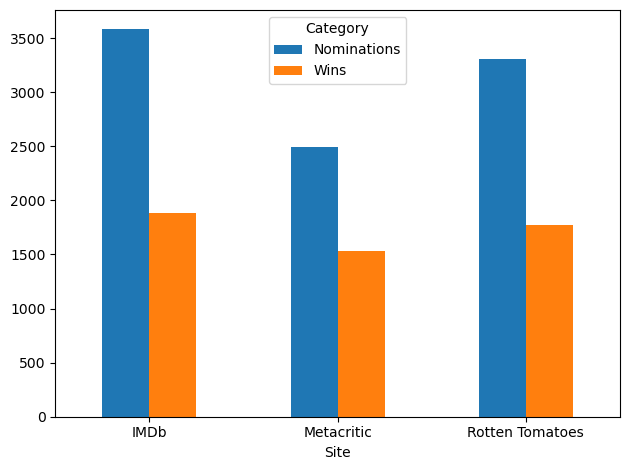

In [6]:
review_sites = ["IMDb", "Rotten Tomatoes", "Metacritic"]
noms_wins = []

for site in review_sites:
    noms_wins.append(movie_data_df.loc[movie_data_df[site] > 70, "Nominations"].sum())
    noms_wins.append(movie_data_df.loc[movie_data_df[site] > 70, "Wins"].sum())

labels = ["IMDb", "IMDb", "Rotten Tomatoes", "Rotten Tomatoes", "Metacritic", "Metacritic"]
cond = ["Nominations", "Wins", "Nominations", "Wins", "Nominations", "Wins"]

bar_df = pd.DataFrame({"Site": labels, "Category": cond, "Values": noms_wins})
bar_df.pivot(index='Site', columns='Category', values='Values').plot(kind='bar', rot=0)
plt.tight_layout()
plt.show()

# Analysis of Runtime

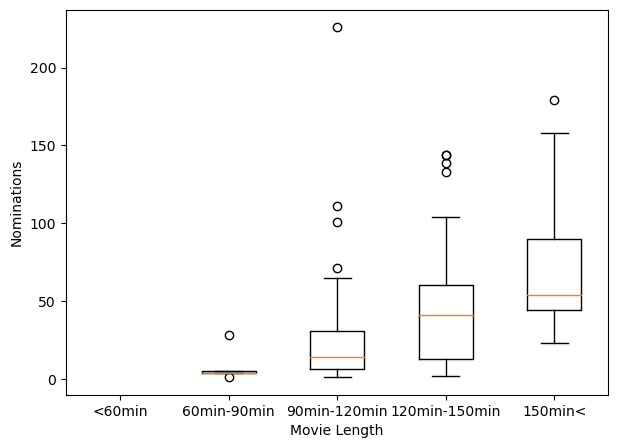

In [7]:
movie_lengths = [0, 60, 90, 120, 150]
length_labels = ["<60min", "60min-90min", "90min-120min", "120min-150min", "150min<"]
length_noms_data = []
length_wins_data = []
i = 0

for i in range(len(movie_lengths)):
    if i == (len(movie_lengths) - 1):
        length_noms_data.append(movie_data_df.loc[movie_data_df["Runtime"] > movie_lengths[i], "Nominations"])
        length_wins_data.append(movie_data_df.loc[movie_data_df["Runtime"] > movie_lengths[i], "Wins"])
    else:
        temp = movie_data_df.loc[movie_data_df["Runtime"] > movie_lengths[i]]
        length_noms_data.append(temp.loc[temp["Runtime"] < movie_lengths[i+1], "Nominations"])
        length_wins_data.append(temp.loc[temp["Runtime"] < movie_lengths[i+1], "Wins"])
    i += 1

plt_box = plt.figure(figsize = (7,5))
plt.boxplot(length_noms_data, labels=length_labels)
plt.xlabel("Movie Length")
plt.ylabel("Nominations")
plt.show()

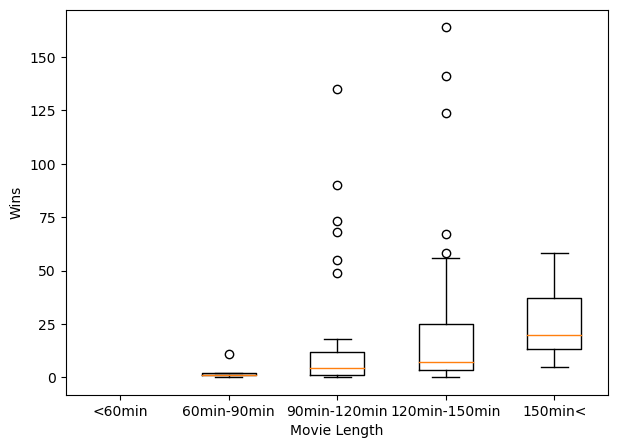

In [8]:
plt_box = plt.figure(figsize = (7,5))
plt.boxplot(length_wins_data, labels=length_labels)
plt.xlabel("Movie Length")
plt.ylabel("Wins")
plt.show()

In [9]:
bins = [0,90,120,150,180,210]
labels = ['0 - 89', '90 - 119', '120 -149','150 - 179', '> 180']

In [10]:
movie_data_df['Runtime Bucket (mins)'] = pd.cut(movie_data_df['Runtime'],bins,labels=labels)
movie_data_df.head()

,ID,Title,Year,Runtime,Box Office,IMDb,Rotten Tomatoes,Metacritic,Nominations,Wins,Runtime Bucket (mins)
0,tt0381061,Casino Royale,2006,144,167445960.0,80,94,80,44,28,120 -149
1,tt0482571,The Prestige,2006,130,53089891.0,85,76,66,45,6,120 -149
2,tt1232829,21 Jump Street,2012,109,138447667.0,72,85,69,21,11,90 - 119
3,tt1853728,Django Unchained,2012,165,162805434.0,84,87,81,158,58,150 - 179
4,tt0993846,The Wolf of Wall Street,2013,180,116900694.0,82,80,75,179,37,150 - 179


In [11]:
winner_bins = [-1,0,200]
winner_labels = ['0','1']

movie_data_df['Award Winner'] = pd.cut(movie_data_df['Wins'],winner_bins,labels=winner_labels)
movie_data_df = movie_data_df.astype({'Award Winner' : 'int'})
total_wins = movie_data_df['Award Winner'].sum()
movie_data_df.head()

,ID,Title,Year,Runtime,Box Office,IMDb,Rotten Tomatoes,Metacritic,Nominations,Wins,Runtime Bucket (mins),Award Winner
0,tt0381061,Casino Royale,2006,144,167445960.0,80,94,80,44,28,120 -149,1
1,tt0482571,The Prestige,2006,130,53089891.0,85,76,66,45,6,120 -149,1
2,tt1232829,21 Jump Street,2012,109,138447667.0,72,85,69,21,11,90 - 119,1
3,tt1853728,Django Unchained,2012,165,162805434.0,84,87,81,158,58,150 - 179,1
4,tt0993846,The Wolf of Wall Street,2013,180,116900694.0,82,80,75,179,37,150 - 179,1


In [12]:
movie_data_df['Runtime Bucket (mins)'].value_counts()

90 - 119     47
120 -149     39
150 - 179    13
0 - 89        5
> 180         0
Name: Runtime Bucket (mins), dtype: int64

<Axes: ylabel='Runtime Bucket (mins)'>

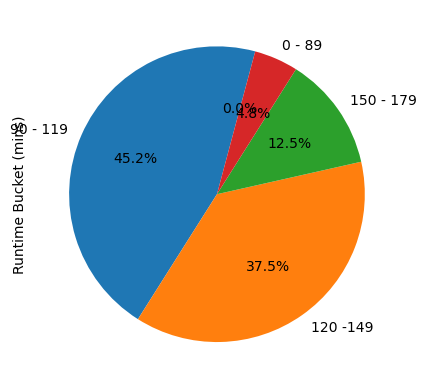

In [13]:
movie_data_df['Runtime Bucket (mins)'].value_counts().plot(kind='pie',y='', autopct='%1.1f%%', startangle=75, shadow =False)

# Analysis of Box Office

In [14]:
box_office_bins = [0, 50000000, 100000000,  150000000, 200000000, 250000000, 300000000,350000000, 400000000, 450000000, 500000000]
box_office_labels = ["0 to 50", "50-100", "100-150", "150-200", "200-250",
                "250-300","300-350", "350-400", "400-450","450-500"]

In [15]:
movie_data_df['Box Office Groupings (millions)'] = pd.cut(movie_data_df['Box Office'],bins=box_office_bins, labels=box_office_labels)
movie_data_df.head()

,ID,Title,Year,Runtime,Box Office,IMDb,Rotten Tomatoes,Metacritic,Nominations,Wins,Runtime Bucket (mins),Award Winner,Box Office Groupings (millions)
0,tt0381061,Casino Royale,2006,144,167445960.0,80,94,80,44,28,120 -149,1,150-200
1,tt0482571,The Prestige,2006,130,53089891.0,85,76,66,45,6,120 -149,1,50-100
2,tt1232829,21 Jump Street,2012,109,138447667.0,72,85,69,21,11,90 - 119,1,100-150
3,tt1853728,Django Unchained,2012,165,162805434.0,84,87,81,158,58,150 - 179,1,150-200
4,tt0993846,The Wolf of Wall Street,2013,180,116900694.0,82,80,75,179,37,150 - 179,1,100-150


/var/folders/z1/1sbxvkbx0jjc2gfz5ytpg7g40000gn/T/ipykernel_23406/2497380678.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = movie_data_df.groupby('Box Office Groupings (millions)').sum()['Wins']


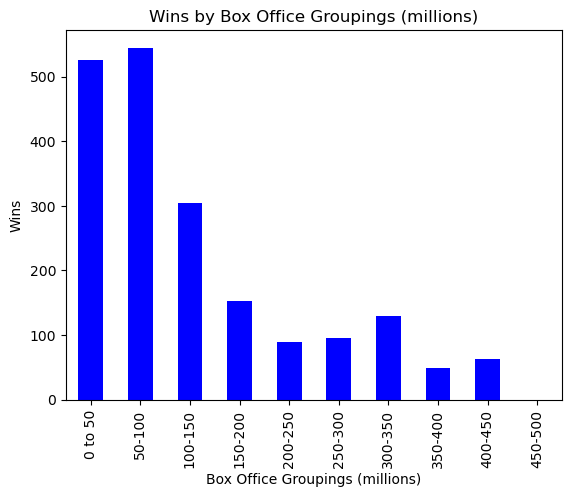

In [16]:
# x = movie_data_df["Box Office"]
#y = movie_data_df["Wins"]

#plt.bar(x, y, color="b", align="center")

# Group by 'Box Office Groupings (millions)' and sum the 'Wins'
grouped_data = movie_data_df.groupby('Box Office Groupings (millions)').sum()['Wins']

# Plot the aggregated data
grouped_data.plot(kind='bar', color='b', align='center')
plt.ylabel('Wins')
plt.title('Wins by Box Office Groupings (millions)')
plt.show()

In [17]:
# Group by 'Box Office Groupings (millions)' and sum the 'Wins'
grouped_data

Box Office Groupings (millions)
0 to 50    526
50-100     545
100-150    304
150-200    152
200-250     89
250-300     96
300-350    130
350-400     49
400-450     63
450-500      0
Name: Wins, dtype: int64

In [18]:
movie_data_df.dtypes

ID                                   object
Title                                object
Year                                 object
Runtime                               int64
Box Office                          float64
IMDb                                  int64
Rotten Tomatoes                       int64
Metacritic                            int64
Nominations                           int64
Wins                                  int64
Runtime Bucket (mins)              category
Award Winner                          int64
Box Office Groupings (millions)    category
dtype: object

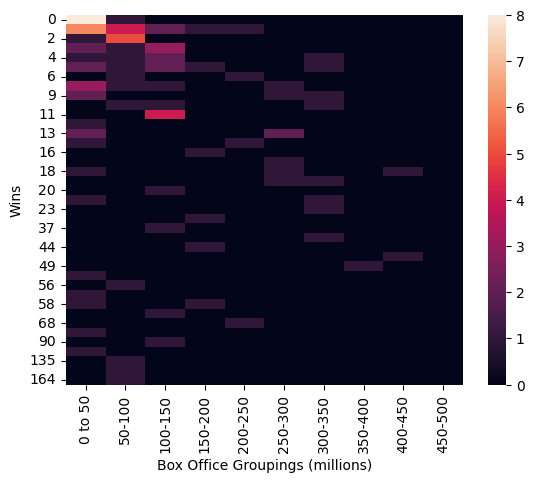

In [19]:
hm = sn.heatmap(movie_data_df.groupby(['Box Office Groupings (millions)','Wins'])
                .size()
                .unstack(level=0))

In [20]:
box_office_bins = [0, 50000000, 100000000,150000000, 200000000, 250000000, 300000000,350000000, 400000000, 450000000, 500000000]
box_office_labels = ["0 to 50", "50-100", "100- 150", "150-200", "200-250","250-300","300-350", "350-400", "400-450","450-500"]

movie_data_df['Box Office Income (millions)'] = pd.cut(movie_data_df['Box Office'],box_office_bins,labels=box_office_labels)

movie_data_df.head()

,ID,Title,Year,Runtime,Box Office,IMDb,Rotten Tomatoes,Metacritic,Nominations,Wins,Runtime Bucket (mins),Award Winner,Box Office Groupings (millions),Box Office Income (millions)
0,tt0381061,Casino Royale,2006,144,167445960.0,80,94,80,44,28,120 -149,1,150-200,150-200
1,tt0482571,The Prestige,2006,130,53089891.0,85,76,66,45,6,120 -149,1,50-100,50-100
2,tt1232829,21 Jump Street,2012,109,138447667.0,72,85,69,21,11,90 - 119,1,100-150,100- 150
3,tt1853728,Django Unchained,2012,165,162805434.0,84,87,81,158,58,150 - 179,1,150-200,150-200
4,tt0993846,The Wolf of Wall Street,2013,180,116900694.0,82,80,75,179,37,150 - 179,1,100-150,100- 150
